In [2]:
!git clone https://github.com/dhrim/darkeras-yolov4

Cloning into 'darkeras-yolov4'...
remote: Enumerating objects: 165, done.
remote: Counting objects: 100% (165/165), done.
remote: Compressing objects: 100% (145/145), done.
remote: Total 165 (delta 81), reused 35 (delta 15), pack-reused 0
Receiving objects: 100% (165/165), 5.57 MiB | 10.87 MiB/s, done.
Resolving deltas: 100% (81/81), done.


In [3]:
%cd darkeras-yolov4

/content/darkeras-yolov4


# 모델 파일 다운로드

In [3]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [13]:
!cp /gdrive/MyDrive/tmp/yolov3_custom_last.weights ./

In [14]:
!ls -al *.weights

-rw------- 1 root root 246305388 Jan 11 10:15 yolov3_custom_last.weights


copy from https://github.com/tranleanh/darkeras-yolov4/blob/main/darkeras-yolov3.ipynb

# 데이터 다운로드

In [15]:
!unzip /gdrive/MyDrive/tmp/Raccoon.zip -d Raccoon

Archive:  /gdrive/MyDrive/tmp/Raccoon.zip
   creating: Raccoon/test/
  inflating: Raccoon/test/_darknet.labels  
  inflating: Raccoon/test/raccoon-57_jpg.rf.26f3fae218f26088f6a7405c58ae8020.jpg  
  inflating: Raccoon/test/raccoon-57_jpg.rf.26f3fae218f26088f6a7405c58ae8020.txt  
  inflating: Raccoon/test/raccoon-58_jpg.rf.ff9de9977475e0086e7ab582122c5167.jpg  
  inflating: Raccoon/test/raccoon-58_jpg.rf.ff9de9977475e0086e7ab582122c5167.txt  
  inflating: Raccoon/test/raccoon-59_jpg.rf.388d6dd8c9d5a6fc7ca75790e680c269.jpg  
  inflating: Raccoon/test/raccoon-59_jpg.rf.388d6dd8c9d5a6fc7ca75790e680c269.txt  
  inflating: Raccoon/test/raccoon-60_jpg.rf.cff8b797e6b5c9b716b6be70be2b6b33.jpg  
  inflating: Raccoon/test/raccoon-60_jpg.rf.cff8b797e6b5c9b716b6be70be2b6b33.txt  
  inflating: Raccoon/test/raccoon-61_jpg.rf.58c4f561336525f59d395ce21508523b.jpg  
  inflating: Raccoon/test/raccoon-61_jpg.rf.58c4f561336525f59d395ce21508523b.txt  
  inflating: Raccoon/test/raccoon-62_jpg.rf.e997ede5457f0

# 모델 생성

In [16]:
import yolov3_wrapper
model = yolov3_wrapper.YoloV3Wrapper("yolov3_custom_last.weights", class_num=1)

In [17]:
# model.save("custom_model.h5")

# 이미지 로딩

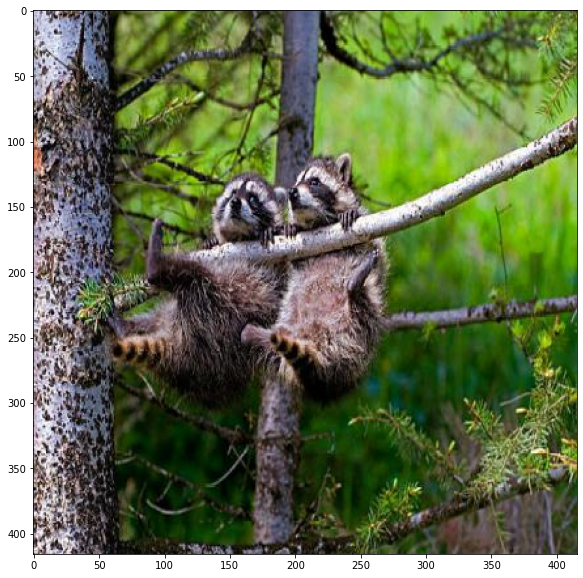

In [33]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

INPUT_SIZE = 608

image_path = "Raccoon/test/raccoon-63_jpg.rf.1b33356e79739a8a1f3676a9f4f9f97a.jpg"
image      = cv2.imread(image_path)
image      = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(12,10))
plt.imshow(image)
plt.show()

# 탐지 실행

In [34]:
bboxes = model.predict(image)

In [36]:
print(len(bboxes))
for bbox in bboxes:
    print(bbox)

1
[ 29.09693718  87.75128937 335.93508911 382.86395264   0.96003932
   0.        ]


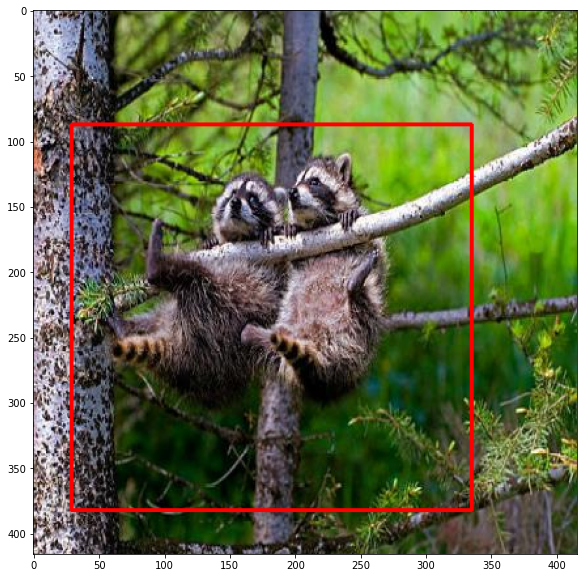

In [42]:
dummy = np.copy(image)

for box in bboxes:
    confidence = box[4]
    box = box.astype(np.int16)
    x1, y1, x2, y2 = box[0], box[1], box[2], box[3]
    class_id = box[5]
        
    dummy = cv2.rectangle(dummy, (x1,y1), (x2,y2), (255,0,0), 2)
     
plt.figure(figsize=(12,10))
plt.imshow(dummy)
plt.show()